In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [5]:
PATH = '../voronoi/2K'
VERTEX_PATH = PATH + '/vertices.txt'
RIDGES_PATH = PATH + '/ridges.txt'

In [6]:
ridges = np.loadtxt(RIDGES_PATH, dtype = int)
vertices = np.loadtxt(VERTEX_PATH)

In [7]:
def plot_grains(vertices, ridges, figsize=(10,7), vertex_plot = True, vertex_size = 3):
    plt.figure(figsize=figsize)
    vertex_total = vertices.shape[0]    
    # Quadrants for periodic boundary conditions
    quadrants = np.concatenate((
                                        vertices, # Quinto cuadrante
                                        vertices + [-1., 1.], # Primer cuadrante
                                        vertices + [0., 1.], # Segundo cuadrante
                                        vertices + [1., 1.], # Tercer cuadrante
                                        vertices + [-1., 0.], # Cuarto cuadrante
                                        vertices + [1., 0.], # Sexto cuadrante
                                        vertices + [-1., -1.], # Séptimo cuadrante
                                        vertices + [0., -1.], # Octavo cuadrante
                                        vertices + [1., -1.] # Noveno cuadrante
                                        ), axis=0)
    """
    ----------------------------------
             -             -
      1      -     2       -     3
    ----------------------------------
             -             -
      4      -     5       -     6
    ----------------------------------
             -             -
      7      -     8       -     9
    ----------------------------------
    """
    for vpair in ridges:
        v0 = vertices[vpair[0]]
        v1 = vertices[vpair[1]]
        """
            Heuristica que indica si 2 vertices estan conectados a traves de bordes.
            Si la distancia entre 2 vertices conectados es >= 0.5, estan conectados a traves de un borde.
        """
        if np.linalg.norm(v1-v0) < 0.5:   
            # Draw a line from v0 to v1.
            plt.plot([v0[0], v1[0]], [v0[1], v1[1]], 'k', linewidth=0.5)
        else:
            min_v0 = (np.infty,-1)
            min_v1 = (np.infty,-1)
            # Se escoje el cuadrante con la menor distancia entre el par de vertices y se hace plot a 2 lineas.
            for vertex_number in range(vertex_total, quadrants.shape[0], vertex_total):
                norm_v0 = np.linalg.norm(quadrants[vertex_number + vpair[1]] - v0)
                norm_v1 = np.linalg.norm(quadrants[vertex_number + vpair[0]] - v1)
                if norm_v0 < min_v0[0]:
                    min_v0 = (norm_v0, vertex_number)
                if norm_v1 < min_v1[0]:
                    min_v1 = (norm_v1, vertex_number)
            plt.plot([v0[0], quadrants[min_v0[1] + vpair[1]][0]], [v0[1], quadrants[min_v0[1] + vpair[1]][1]], 'k', linewidth=0.5)
            plt.plot([v1[0], quadrants[min_v1[1] + vpair[0]][0]], [v1[1], quadrants[min_v1[1] + vpair[0]][1]], 'k', linewidth=0.5)
    # Se toma solo el plot de el quinto cuadrante.
    plt.xlim(0., 1.)
    plt.ylim(0., 1.)
    # Mark the Voronoi vertices if vertex_plot = True.
    if vertex_plot:
        plt.plot(vertices[:,0], vertices[:, 1], "ko", ms=vertex_size)
    plt.show()

In [5]:
def move_vertex(vertices, vertex_n, direction, distance):
    x_mov = np.cos(direction) * distance
    y_mov = np.sin(direction) * distance
    vertices[vertex_n][0] += x_mov
    vertices[vertex_n][1] += y_mov

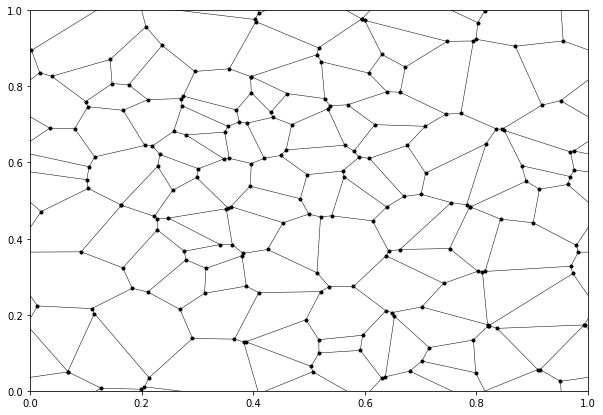

In [8]:
plot_grains(vertices, ridges, figsize=(10,7))